In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# Load data
awards_players_df = pd.read_csv('../data/awards_players.csv')
coaches_df = pd.read_csv('../data/coaches.csv')
players_teams_df = pd.read_csv('../data/players_teams.csv')
players_df = pd.read_csv('../data/players.csv')
series_post_df = pd.read_csv('../data/series_post.csv')
teams_post_df = pd.read_csv('../data/teams_post.csv')
teams_df = pd.read_csv('../data/teams.csv')

## Awards players dataset exploration

### Number of awards per player 

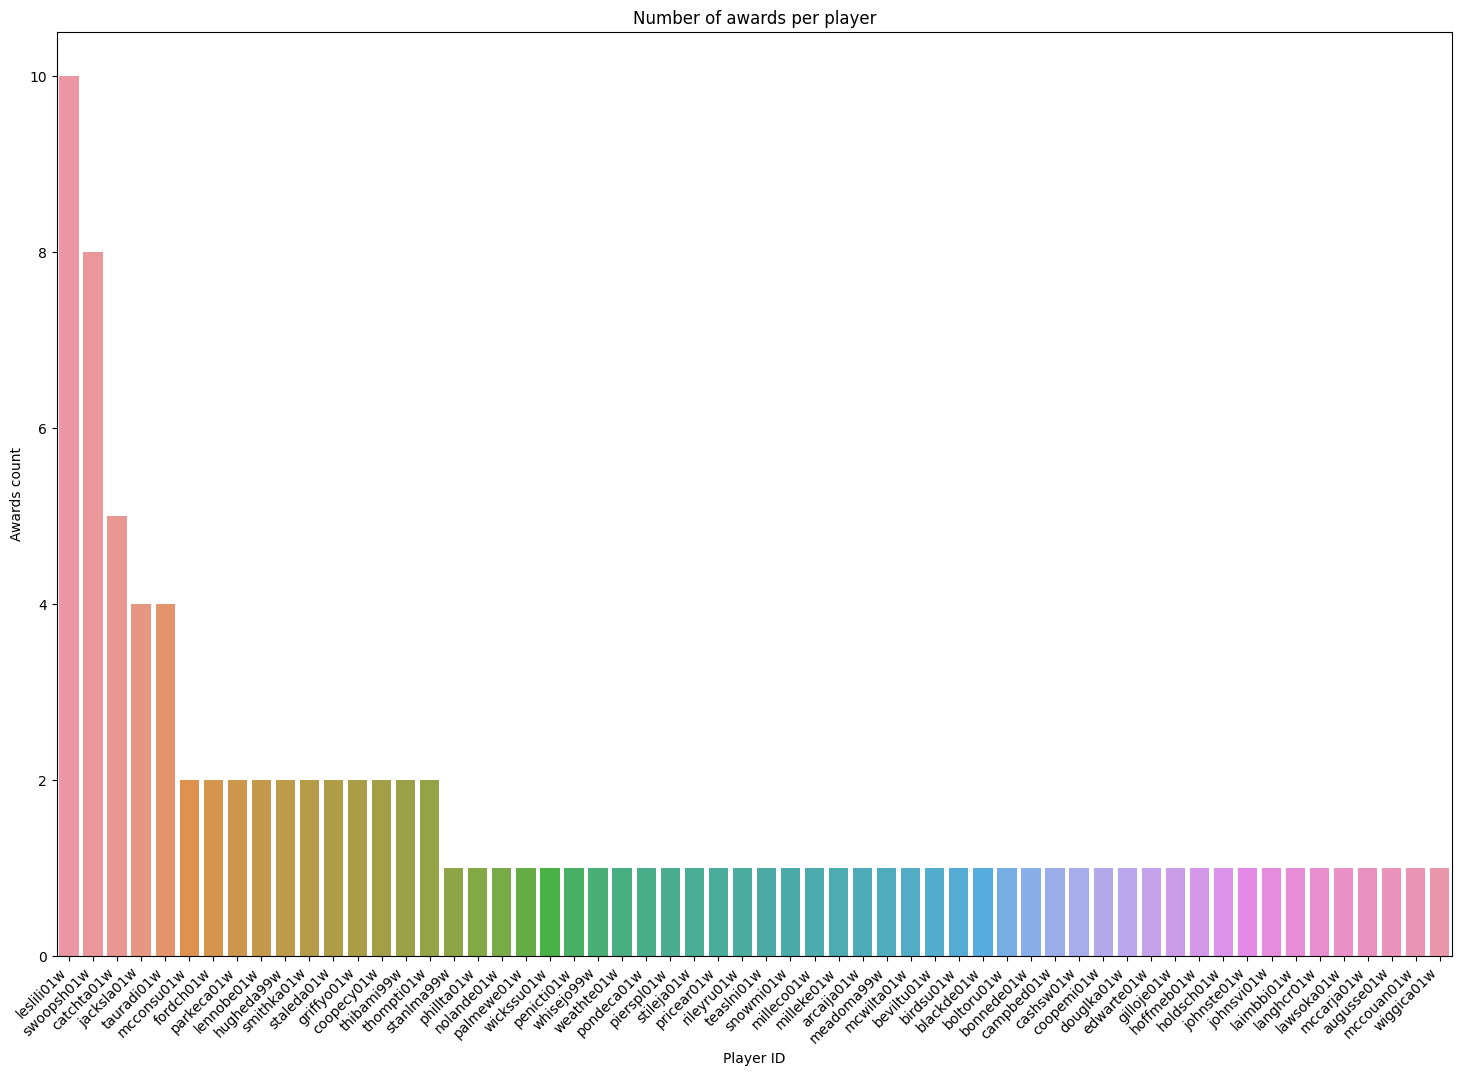

In [32]:
# unique awards
awards_players_df['award'].nunique() # 12 types of awards

# number of awards for each player
player_awards_count = awards_players_df.groupby('playerID')['award'].count().reset_index()

# Sort players based on the number of awards in descending order
player_awards_count = player_awards_count.sort_values(by='award', ascending=False)

# Create the bar plot
plt.figure(figsize=(18, 12))
sns.barplot(x='playerID', y='award', data=player_awards_count)
plt.title('Number of awards per player')
plt.xlabel('Player ID')
plt.ylabel('Awards count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for playerID labels
plt.show()

## Coaches dataset exploration

### Wins and losses vs post season wins and losses

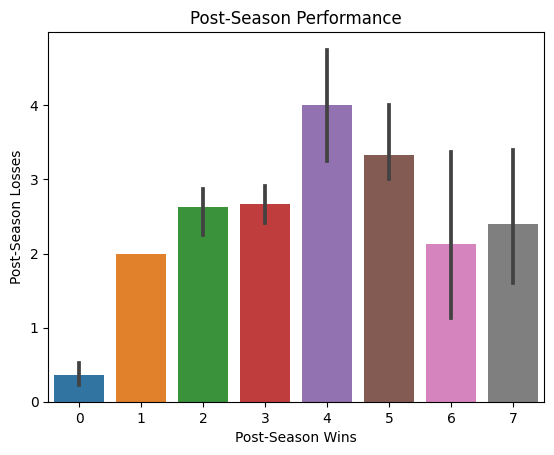

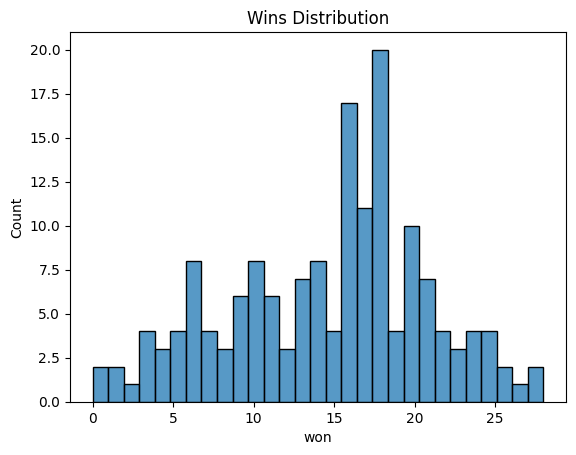

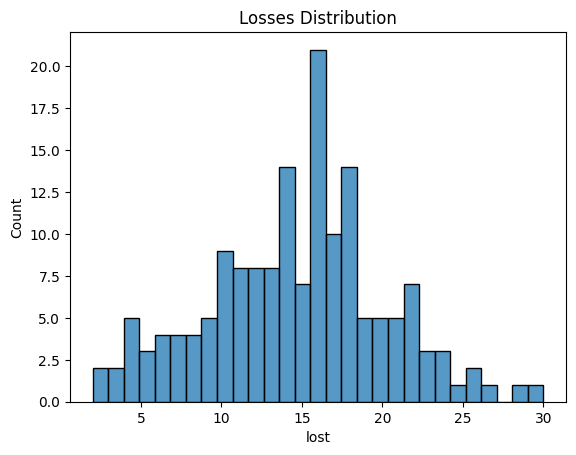

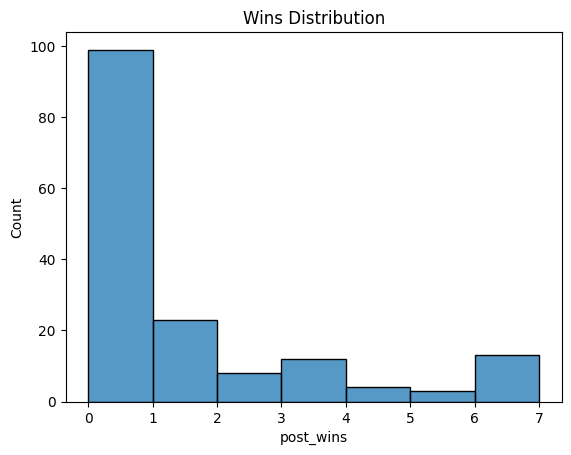

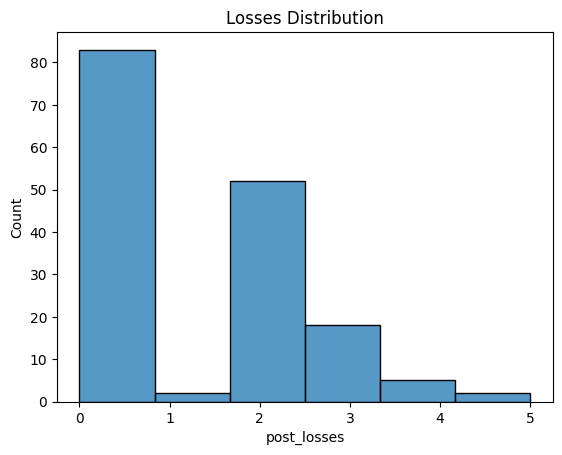

In [33]:
# Bar plot of post-season wins and losses
sns.barplot(x='post_wins', y='post_losses', data=coaches_df)
plt.title('Post-Season Performance')
plt.xlabel('Post-Season Wins')
plt.ylabel('Post-Season Losses')
plt.show()

sns.histplot(coaches_df['won'],  bins=29)
plt.title('Wins Distribution')
plt.show()

sns.histplot(coaches_df['lost'], bins=29)
plt.title('Losses Distribution')
plt.show()

sns.histplot(coaches_df['post_wins'],  bins=7)
plt.title('Wins Distribution')
plt.show()

sns.histplot(coaches_df['post_losses'], bins=6)
plt.title('Losses Distribution')
plt.show()

### Barplot with wins and losses for each coach

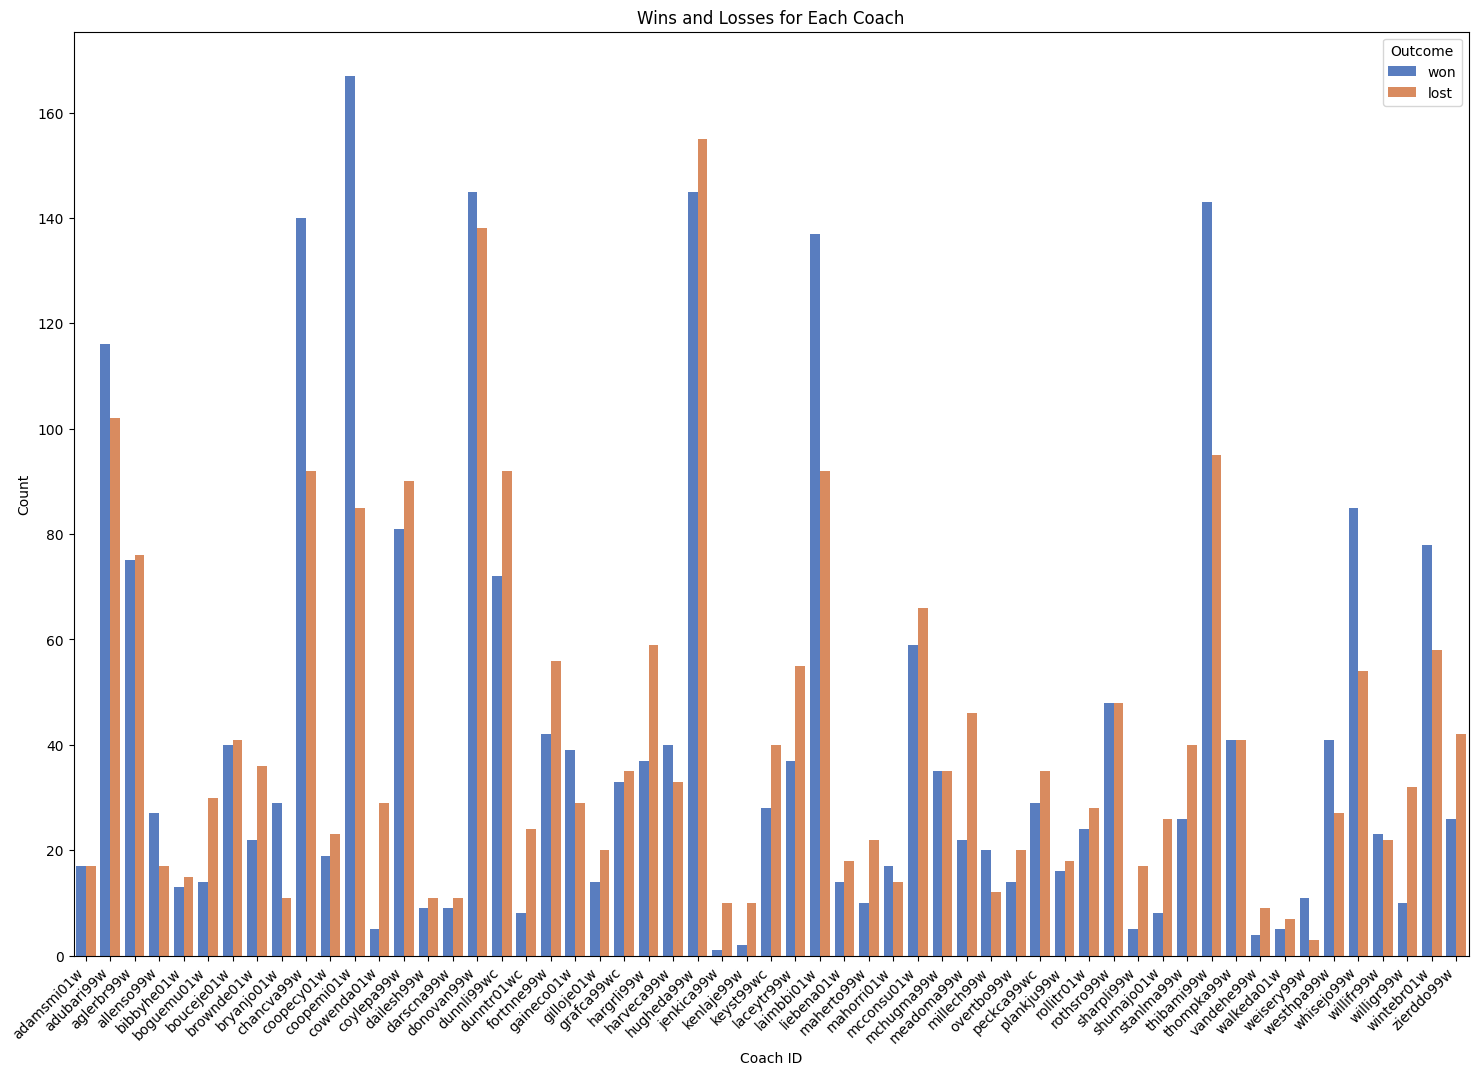

In [34]:
# Create a new DataFrame with wins and losses for each coach
coach_wins_losses = coaches_df.groupby('coachID').sum().reset_index()
coach_wins_losses = coach_wins_losses[['coachID', 'won', 'lost']]
coach_wins_losses['ratio'] = coach_wins_losses['won'] / (coach_wins_losses['won'] + coach_wins_losses['lost'])

# Melt the DataFrame for Seaborn's barplot
coach_wins_losses_melted = coach_wins_losses.melt(id_vars='coachID', value_vars=['won', 'lost'], var_name='Outcome', value_name='Count')

# Create the histogram for the absolute values
plt.figure(figsize=(18, 12))
sns.barplot(x='coachID', y='Count', hue='Outcome', data=coach_wins_losses_melted, palette='muted')
plt.title('Wins and Losses for Each Coach')
plt.xlabel('Coach ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()


### Barplot with ratio of wins to losses for each coach

<Axes: title={'center': 'Win/Loss ratio per coach'}, xlabel='coachID'>

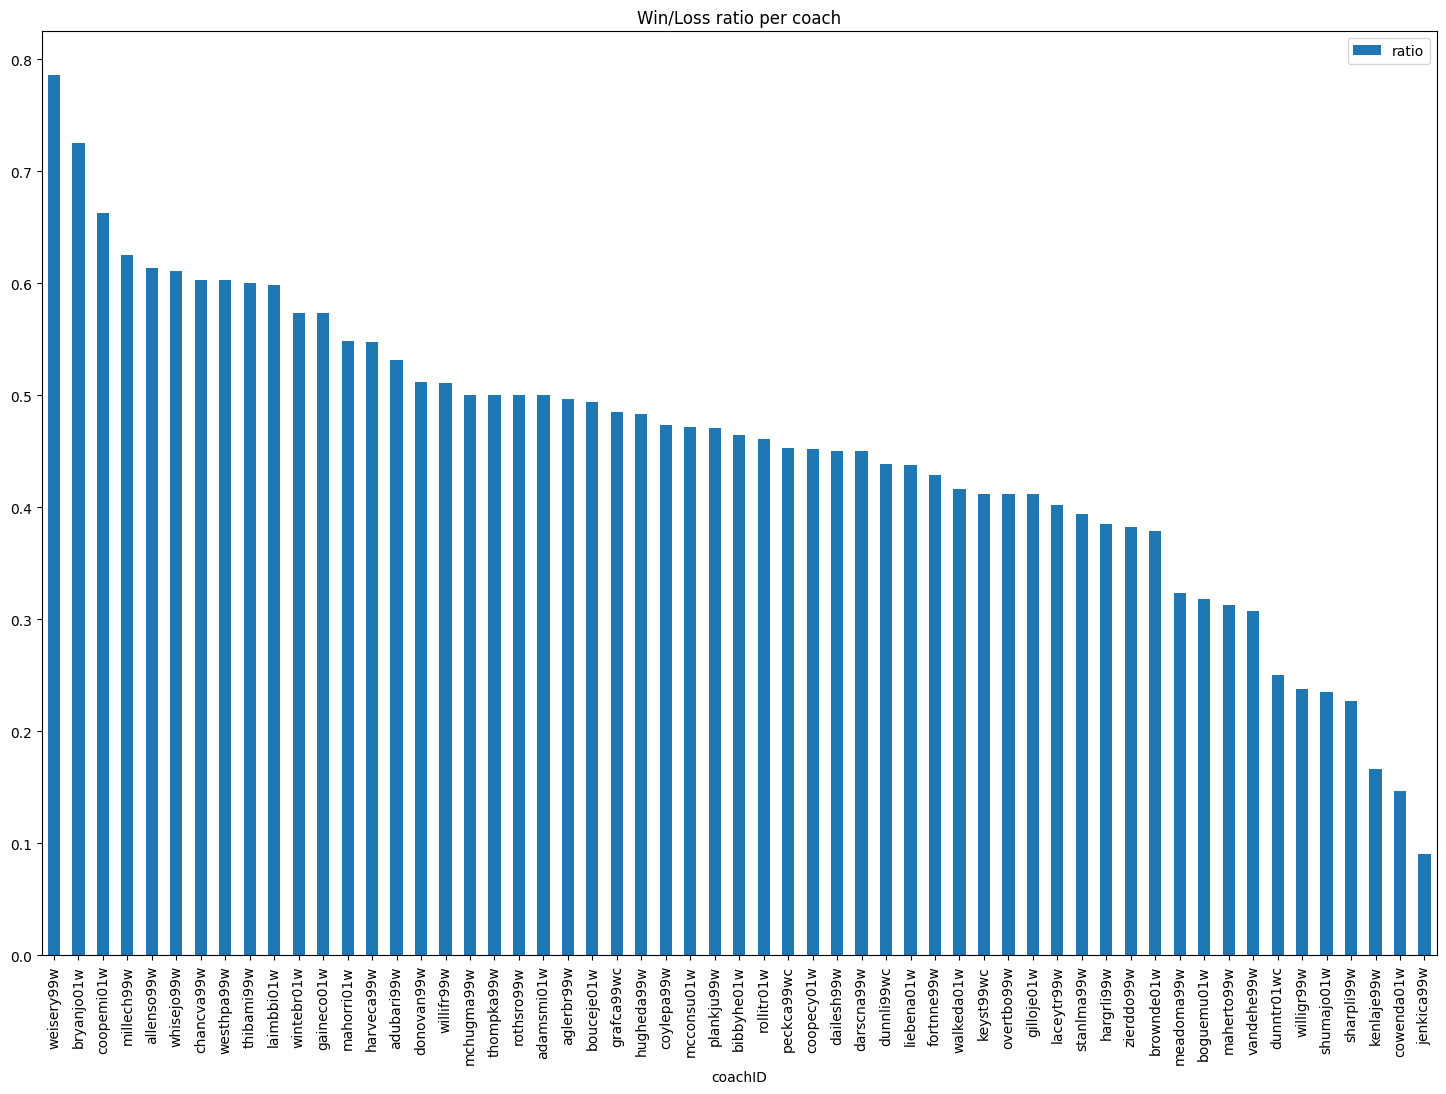

In [35]:
# Create the histogram for the ratio
coach_wins_losses[['coachID', 'ratio']].sort_values('ratio', ascending=False).plot('coachID', 'ratio', kind='bar', figsize=(18, 12), title="Win/Loss ratio per coach")

## Players dataset exploration

### College exploration

Number of colleges: 156


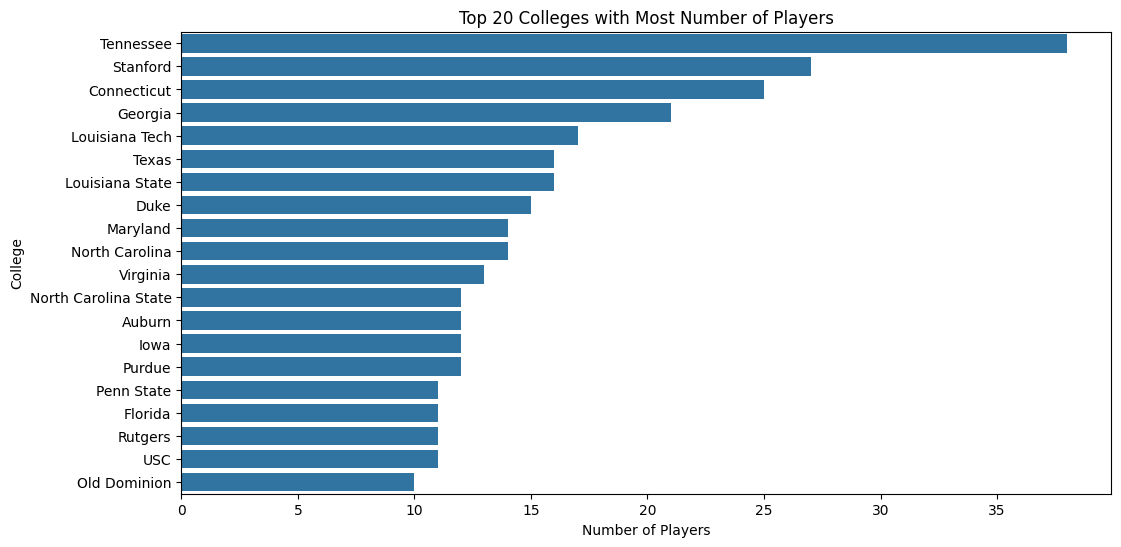

In [39]:
# Number of unique college values
num_colleges = players_df['college'].nunique()
print("Number of colleges:", num_colleges) # 160

# Count the number of players for each college
players_per_college = players_df['college'].value_counts().reset_index()
players_per_college.columns = ['College', 'Player Count']

# Select the top 20 colleges
top_20_colleges = players_per_college.head(20)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Player Count', y='College', data=top_20_colleges, legend=False)
plt.title('Top 20 Colleges with Most Number of Players')
plt.xlabel('Number of Players')
plt.ylabel('College')
plt.show()



### Mean values for player attributes

In [21]:
# Drop rows with 0 values 
players_df.drop(players_df[players_df['height'] == 0].index, inplace = True)
players_df.drop(players_df[players_df['weight'] == 0].index, inplace = True)

# Average height
average_height = players_df['height'].mean()
print("Average height:", average_height) # 71.9 inches

average_weight = players_df['weight'].mean()
print("Average weight:", average_weight) # 167.77 pounds

Average height: 71.91472868217055
Average weight: 167.77260981912144


### Player positions exploration

Player positions: ['C' 'F' 'F-C' 'G' 'F-G' 'G-F' 'C-F']
Number of unique positions: 7


,Position,Player Count
0,G,299
1,F,219
2,C,120
3,F-C,65
4,G-F,51
5,F-G,11
6,C-F,9


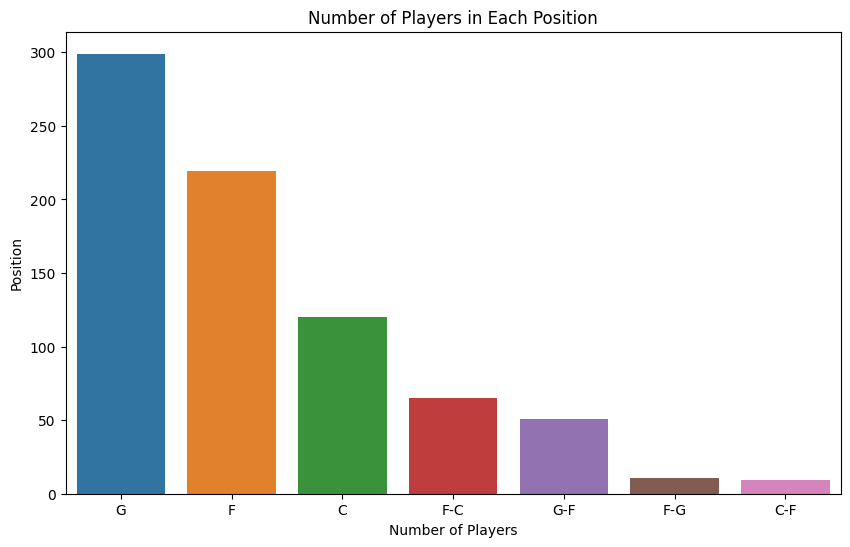

In [36]:
# Plot for number of players in each position
positions = players_df['pos'].unique()
num_positions = players_df['pos'].nunique()

print("Player positions:", positions) # center, forward, forward-center, guard, forward-guard, guard-forward, center-forward
print("Number of unique positions:", num_positions) 

# Count the number of players for each position
players_per_position = players_df['pos'].value_counts().reset_index()
players_per_position.columns = ['Position', 'Player Count']

display(players_per_position)

# Sort positions based on player count
players_per_position = players_per_position.sort_values(by='Player Count', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Player Count', data=players_per_position, hue='Position', legend=False)
plt.title('Number of Players in Each Position')
plt.xlabel('Number of Players')
plt.ylabel('Position')
plt.show()